In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [21]:
file_path = '/content/drive/My Drive/BoTNeTIoT-L01-v2.csv'
real = pd.read_csv(file_path)


In [22]:
data = pd.DataFrame(real)

In [23]:
data.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [25]:
print(data.columns)

Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')


In [26]:
data.shape

(7062606, 27)

In [27]:
print(data.describe())

       MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
count        7.062606e+06      7.062605e+06          7.062606e+06   
mean         3.400682e+03      1.794441e+02          1.931062e+04   
std          2.897012e+03      1.537109e+02          2.636844e+04   
min          1.000000e+00      6.000000e+01          0.000000e+00   
25%          1.000000e+00      6.000000e+01          0.000000e+00   
50%          3.644882e+03      7.412707e+01          9.807711e+01   
75%          6.354692e+03      3.486463e+02          4.887076e+04   
max          8.946997e+03      1.401994e+03          4.520011e+05   

       H_L0.1_weight   H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  \
count   7.062606e+06  7.062606e+06     7.062606e+06    7.062606e+06   
mean    3.400682e+03  1.794441e+02     1.931066e+04    1.892359e+03   
std     2.897012e+03  1.537107e+02     2.636842e+04    2.523083e+03   
min     1.000000e+00  6.000000e+01     0.000000e+00    1.000000e+00   
25%     1.000000e+00  6

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MI_dir_L0.1_weight    float64
 1   MI_dir_L0.1_mean      float64
 2   MI_dir_L0.1_variance  float64
 3   H_L0.1_weight         float64
 4   H_L0.1_mean           float64
 5   H_L0.1_variance       float64
 6   HH_L0.1_weight        float64
 7   HH_L0.1_mean          float64
 8   HH_L0.1_std           float64
 9   HH_L0.1_magnitude     float64
 10  HH_L0.1_radius        float64
 11  HH_L0.1_covariance    float64
 12  HH_L0.1_pcc           float64
 13  HH_jit_L0.1_weight    float64
 14  HH_jit_L0.1_mean      float64
 15  HH_jit_L0.1_variance  float64
 16  HpHp_L0.1_weight      float64
 17  HpHp_L0.1_mean        float64
 18  HpHp_L0.1_std         float64
 19  HpHp_L0.1_magnitude   float64
 20  HpHp_L0.1_radius      float64
 21  HpHp_L0.1_covariance  float64
 22  HpHp_L0.1_pcc         float64
 23  Device_

In [29]:
print(data.isnull().sum())

MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        1
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            1
HH_L0.1_std             0
HH_L0.1_magnitude       1
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
Device_Name             0
Attack                  0
Attack_subType          0
label                   0
dtype: int64


In [30]:
data['MI_dir_L0.1_mean'].fillna(data['MI_dir_L0.1_mean'].mean(), inplace=True)
data['HH_L0.1_mean'].fillna(data['HH_L0.1_mean'].mean(), inplace=True)
data['HH_L0.1_magnitude'].fillna(method='bfill', inplace=True)


<ipython-input-30-ea828d194645>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MI_dir_L0.1_mean'].fillna(data['MI_dir_L0.1_mean'].mean(), inplace=True)
<ipython-input-30-ea828d194645>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [31]:
print(data.isnull().sum())

MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        0
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            0
HH_L0.1_std             0
HH_L0.1_magnitude       0
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
Device_Name             0
Attack                  0
Attack_subType          0
label                   0
dtype: int64


In [32]:
data.drop_duplicates(keep='last',inplace=True)

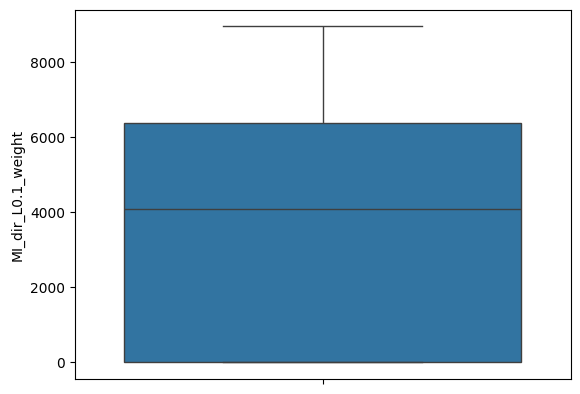

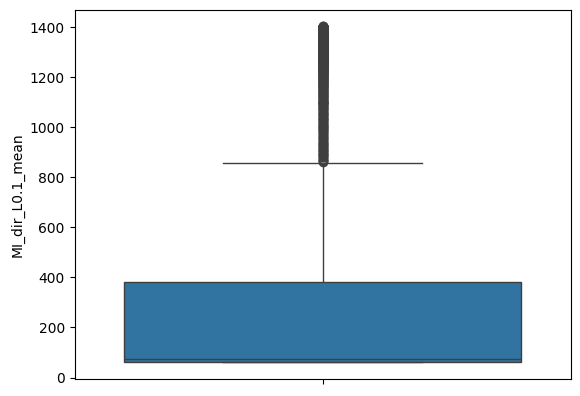

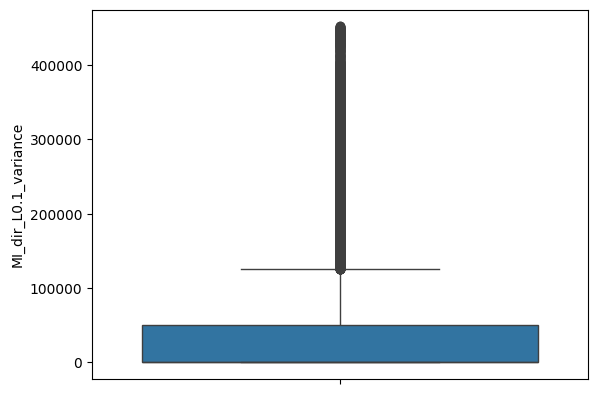

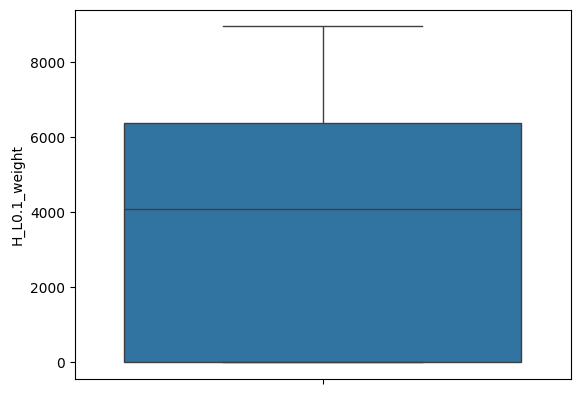

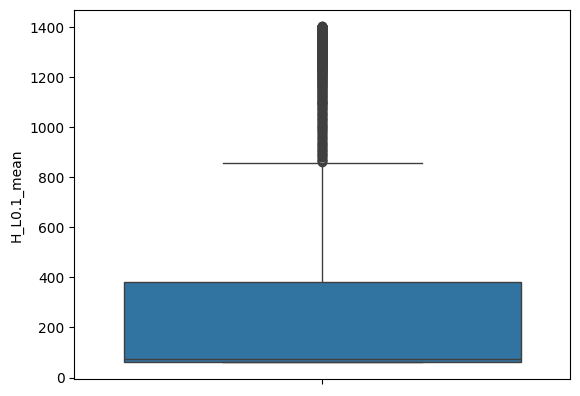

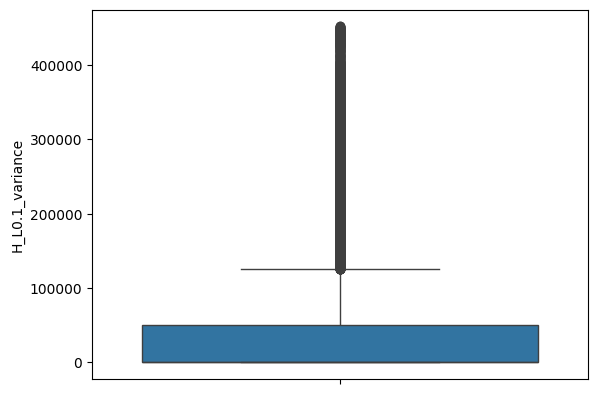

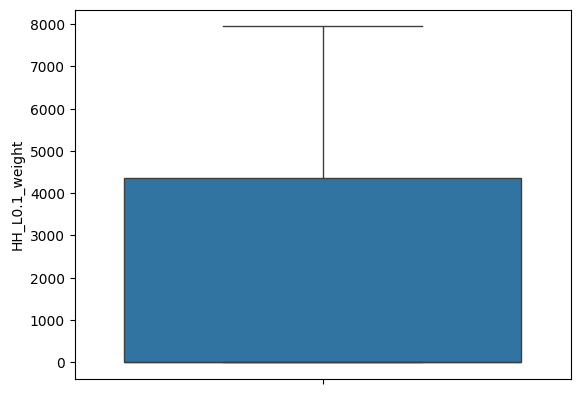

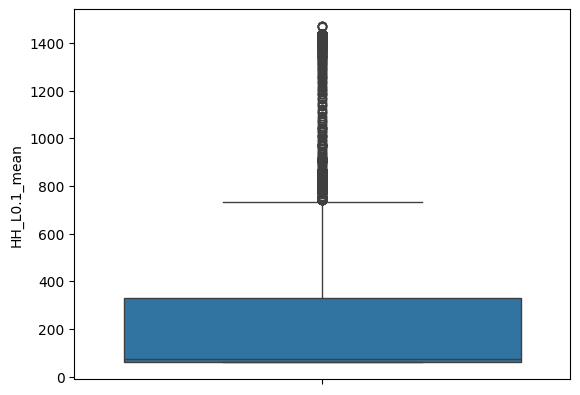

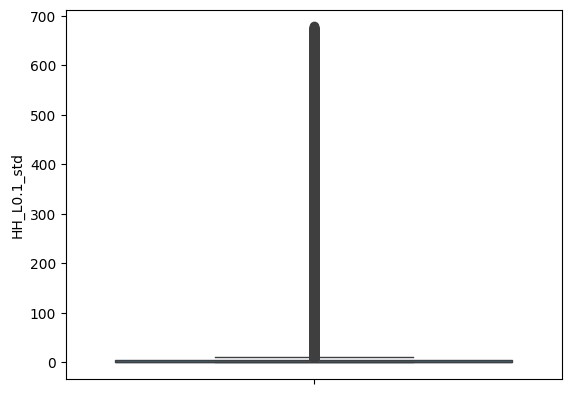

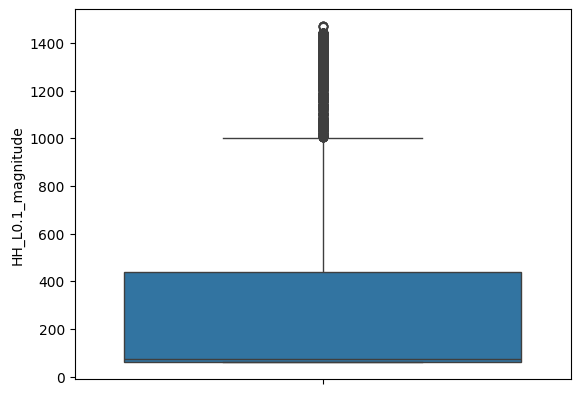

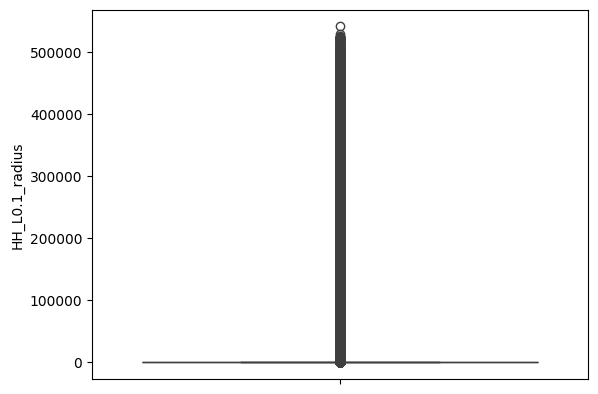

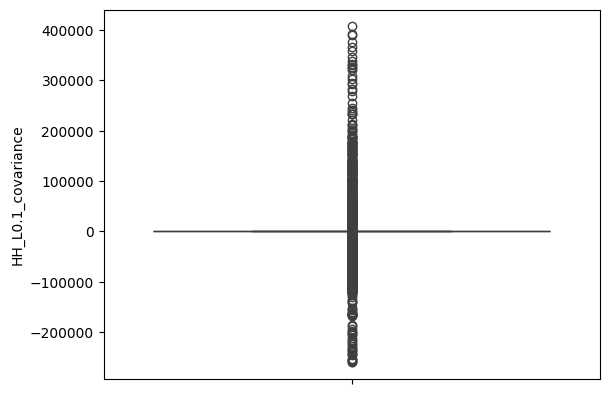

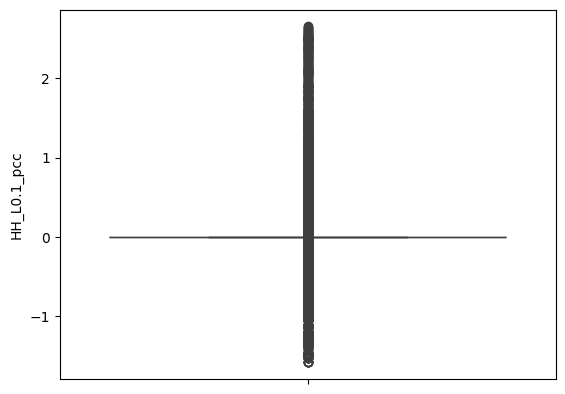

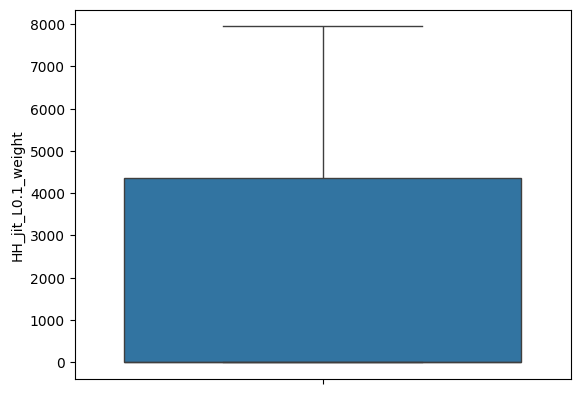

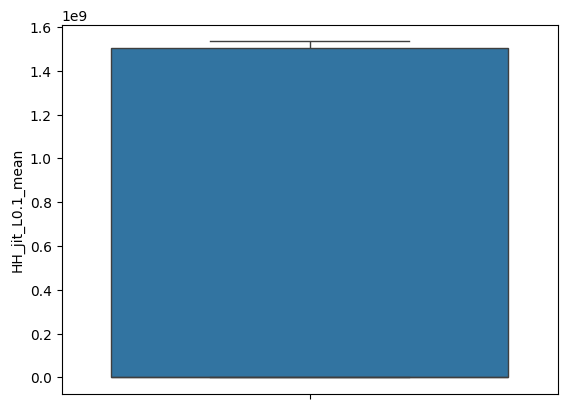

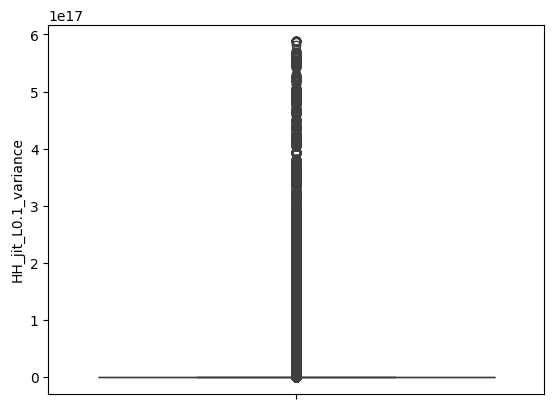

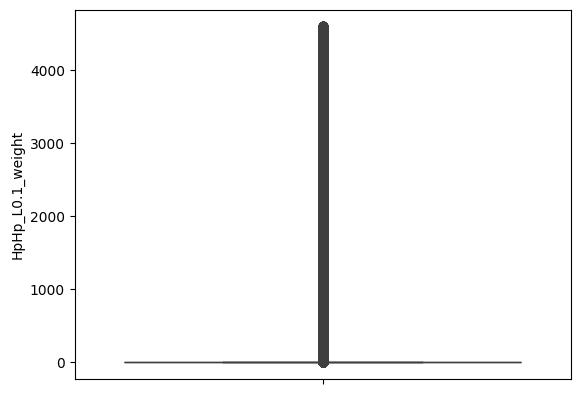

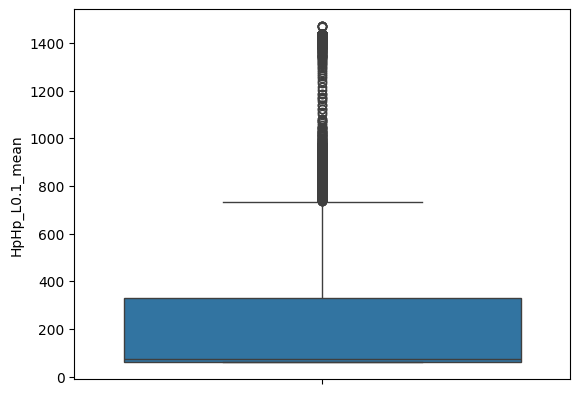

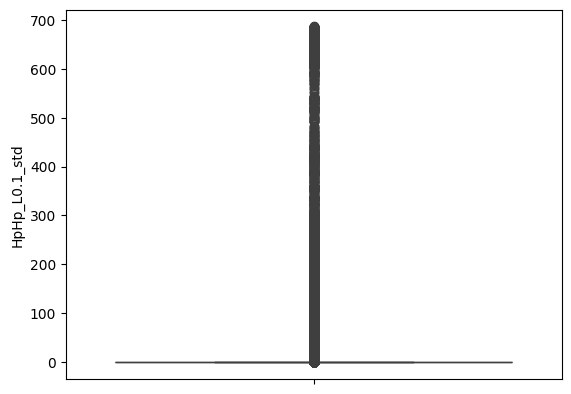

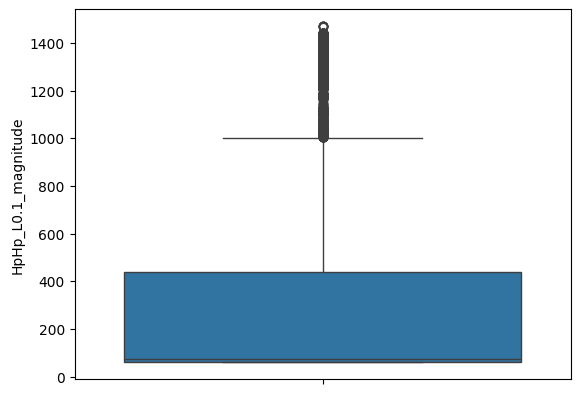

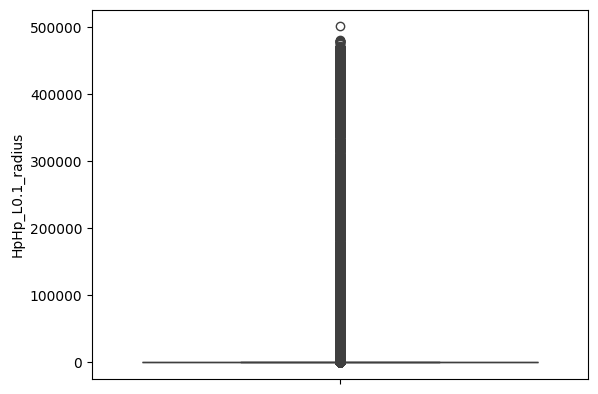

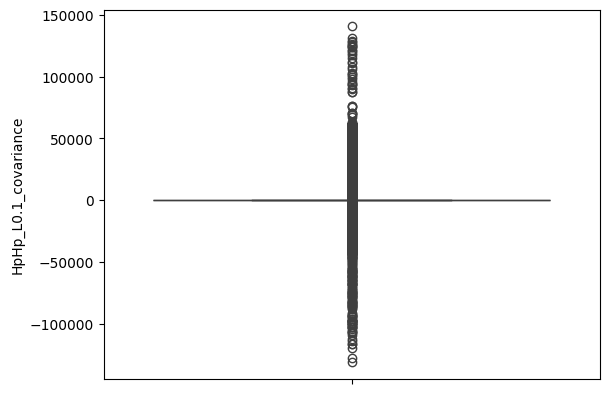

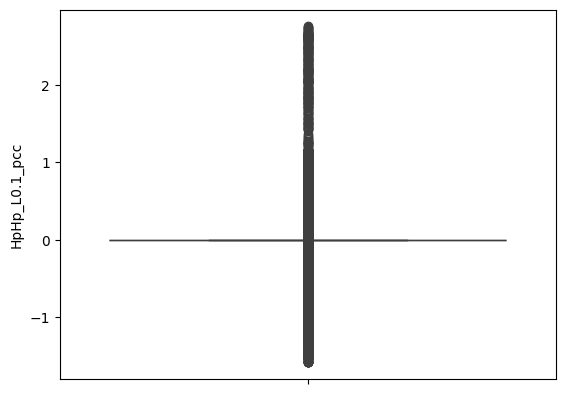

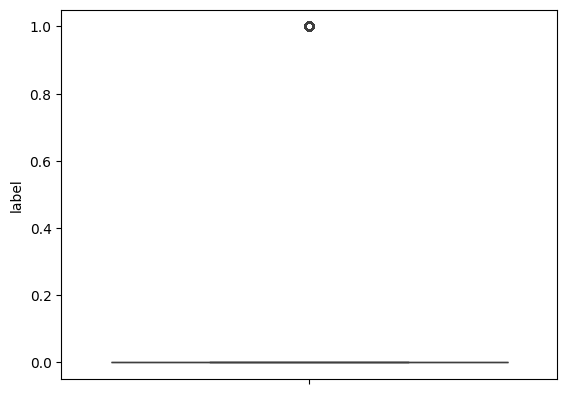

In [33]:
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i])
    plt.show()

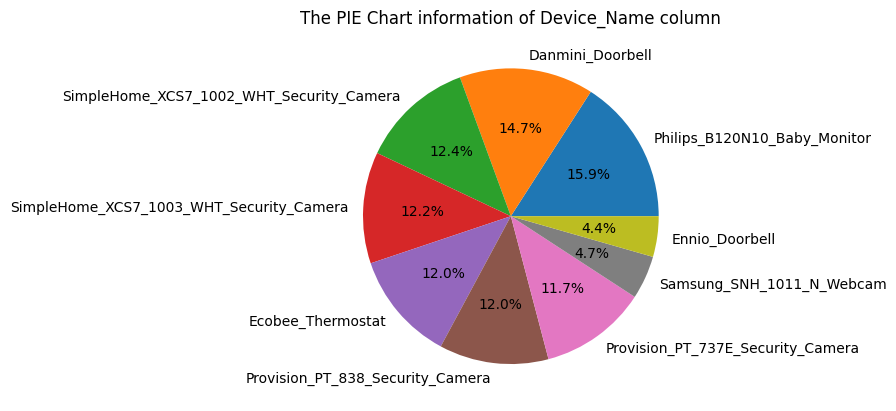

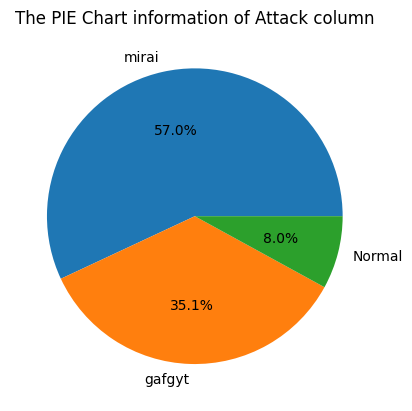

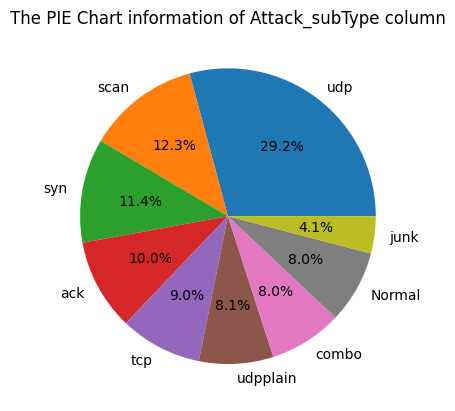

In [16]:
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts()) <=10:
        val=data[i].value_counts().values
        index=data[i].value_counts().index
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [19]:
for i in data.select_dtypes(include='object').columns.values:
    print(data[i].value_counts())
    print("\n--------------------------------\n")

Device_Name
Philips_B120N10_Baby_Monitor                1024970
Danmini_Doorbell                             945653
SimpleHome_XCS7_1002_WHT_Security_Camera     797586
SimpleHome_XCS7_1003_WHT_Security_Camera     784641
Ecobee_Thermostat                            771830
Provision_PT_838_Security_Camera             770184
Provision_PT_737E_Security_Camera            754308
Samsung_SNH_1011_N_Webcam                    305925
Ennio_Doorbell                               285850
Name: count, dtype: int64

--------------------------------

Attack
mirai     3668402
gafgyt    2259045
Normal     513500
Name: count, dtype: int64

--------------------------------

Attack_subType
udp         1879643
scan         793090
syn          733299
ack          643821
tcp          577345
udpplain     523304
combo        515156
Normal       513500
junk         261789
Name: count, dtype: int64

--------------------------------



In [20]:
real = pd.DataFrame(data)

In [18]:
lab=LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i]=lab.fit_transform(data[i])
    print(data[i].head())

0    0
1    0
2    0
3    0
4    0
Name: Device_Name, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: Attack, dtype: int64
0    2
1    2
2    2
3    2
4    2
Name: Attack_subType, dtype: int64


In [19]:
data.tail()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
7062601,2.937269,217.763487,17706.82364,2.937269,217.763487,17706.82364,1.220882,60.000000,9.540000e-07,84.852814,...,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,8,0,0,1
7062602,1.730254,282.630543,10545.88790,1.730254,282.630543,10545.88790,1.213342,330.000000,5.390000e-06,431.490440,...,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,8,0,0,1
7062603,2.730251,299.980395,7204.11662,2.730251,299.980395,7204.11662,1.213352,330.000000,6.610000e-06,431.490440,...,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,8,0,0,1
7062604,2.882414,216.723647,17753.08315,2.882414,216.723647,17753.08315,1.209274,60.000000,6.740000e-07,84.852814,...,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,8,0,0,1
7062605,2.032574,154.377267,13032.48760,2.032574,154.377267,13032.48760,1.299681,145.339354,1.010891e+02,195.783485,...,145.339354,1.010891e+02,195.783485,1.218303e+04,1.917443e+03,2.328946e-01,8,0,0,1


In [20]:
X = data.drop(['label'], axis=1)
y = data['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.98%


In [25]:
print('The logistic regression: ', lr.score(X_test, y_test))

The logistic regression:  0.9197703754880879


Text(0.5, 427.9555555555555, 'Predicted label')

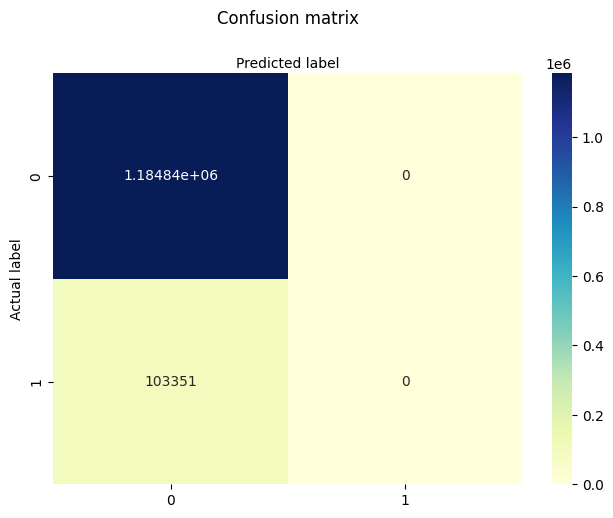

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [27]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

without diabetes       0.92      1.00      0.96   1184839
   with diabetes       0.00      0.00      0.00    103351

        accuracy                           0.92   1288190
       macro avg       0.46      0.50      0.48   1288190
    weighted avg       0.85      0.92      0.88   1288190



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


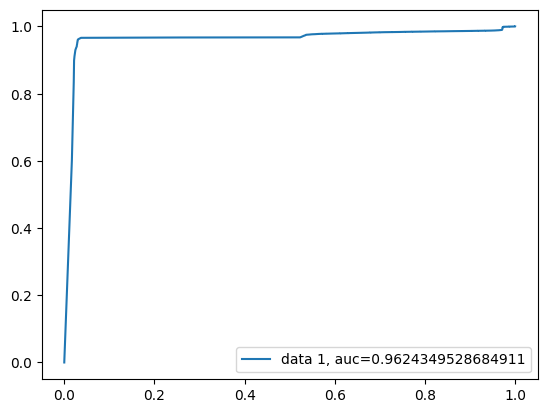

In [28]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()